# Support Vector Classifier (SVC)

In [53]:
import gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

plt.style.use("Solarize_Light2")

In [54]:
from sklearn.datasets import fetch_mldata

mnist = fetch_mldata('MNIST Original')
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [82]:
from sklearn.model_selection import train_test_split

X, y = mnist['data'], mnist['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(f"""X_train: {X_train.shape} X_test: {X_test.shape},
y_train: {y_train.shape} y_test: {y_test.shape}""")

X_train: (52500, 784) X_test: (17500, 784),
y_train: (52500,) y_test: (17500,)


## Model

In [91]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

### How it works

A **Support Vector Classifier (SVC)** is used to provide an optimal hyperplane which can **separate data points into classes**. For a 2D dataset, this hyperplane is a line which separates data points into their individual catagories.

Some key terms need to defined before going further:
* **Gamma** - Determines how far the significant the influence of a single training point is when determining the cost of a model. ** (3) **
* **Margin** - Determined by C in scikit-learn. Determines the acceptable width of the separate boundary. 
    * Hard-Margin - strict and can lead to overfitting. Very sensitive to outliers. C is high.
    * Soft-Margin - more flexible. C is low.
* **Support Vectors** - image below:
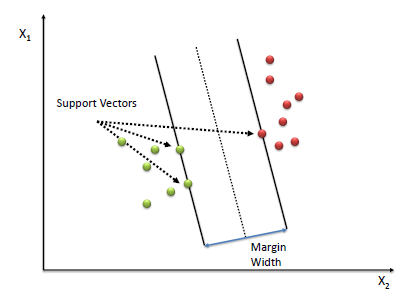
* **Kernel** - These are mathematical functions which take the input and transform it to some other form, which in turn, should make it easier identify class boundaries. Different types of kernels include: linear, nonlinear, polynomial ** (1) **, radial basis functions (RBF) and sigmoid. A kernel will return the inner product between two data records in the dataset, where one is selected as a landmark. Through the inner product, we have some notion of *similarity* between these points. So if we have 2 landmarks, by taking the inner product of each point in the dataset with the landmarks, we can now plot each data point in a 2D plane, regardless of how many features each data point has. ** (2) **

Both gamma and margin regularisation parameters for an SVC.

> #### *The objective is to find a good balance between keeping the street as large as possible and limiting the margin violations. - Tensorflow and Sklearn book page 149.*

SVMs are sensitive to scaling!

#### SV Kernels

#### SV Loss Functions

---
** (1) ** Polynomial kernels are computationally inefficient and are not as effective when it comes to predictions.

** (2) ** The most popular kernel for nonlinearly separable datasets is the RBF. The idea behind this kernel is to create non-linear combinations of features to lift the dataset into a higher dimensional feature space, where linear separation is posisble. The inner product here is defined as: $$\phi_{\gamma}(x, l) = exp(-\gamma \space || \space x-l \space ||^2)$$ where l is the landmark and x the point we want to transform/project.
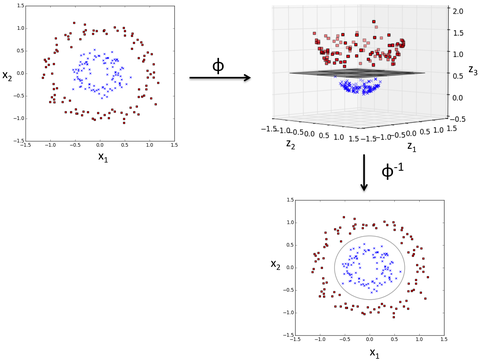

** (3) ** In an RBF Kernel, increasing gamma makes the bell curve around each landmark narrower. From the formula in ** (2) **, we see how a larger gamma would increase the value of the norm, hence increasing how sensitive the model is to points which are further away.

In [95]:
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, 
                                                    test_size=0.1, random_state=42)

### Linear SVC

In [92]:
linear_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=2, loss="hinge", max_iter=100)),
])

linear_svm_clf.fit(X_train2, y_train2)

y_train_pred = cross_val_predict(linear_svm_clf, X_train2, y_train2, cv=5)
y_val_pred = cross_val_predict(linear_svm_clf, X_val, y_val, cv=5)
print(f"train accuracy: {accuracy_score(y_train2, y_train_pred)}")
print(f"val accuracy: {accuracy_score(y_val, y_val_pred)}")

f1 score: [0.9011786  0.92442323 0.78629032 0.80352423 0.82591876 0.72806067
 0.8635514  0.84866469 0.74112735 0.77286136]


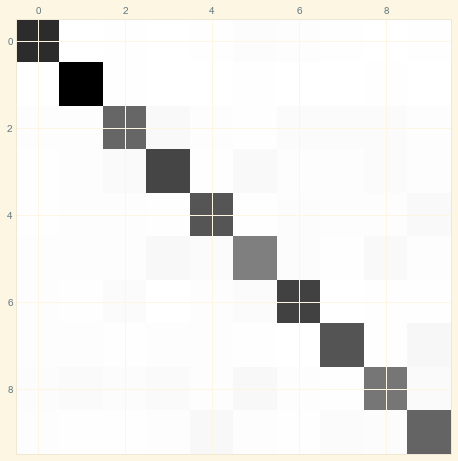

In [94]:
conf_mx = confusion_matrix(y_val, y_val_pred)
print(f"f1 score: {f1_score(y_val, y_val_pred, average=None)}")

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_mx)
plt.show()

### SVC with Minibatch Training

### SVC with Gaussian RBF Kernel

In [99]:
rbf_kernel_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('rbf_kernel', SVC(kernel="rbf", gamma=5, C=0.001, max_iter=5)),
])

rbf_kernel_clf.fit(X_train2, y_train2)

y_train_pred = cross_val_predict(linear_svm_clf, X_train2, y_train2, cv=5)
y_val_pred = cross_val_predict(linear_svm_clf, X_val, y_val, cv=5)
print(f"train accuracy: {accuracy_score(y_train2, y_train_pred)}")
print(f"val accuracy: {accuracy_score(y_val, y_val_pred)}")

train accuracy: 0.8673439153439153
val accuracy: 0.8238095238095238


f1 score: [0.90263876 0.92466297 0.78078078 0.80468047 0.81915934 0.7173913
 0.85981308 0.85068762 0.7406639  0.79227053]


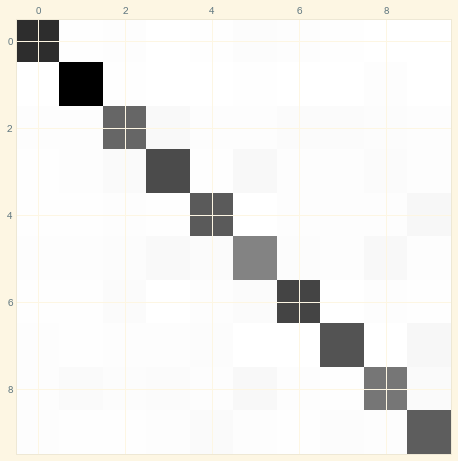

In [100]:
conf_mx = confusion_matrix(y_val, y_val_pred)
print(f"f1 score: {f1_score(y_val, y_val_pred, average=None)}")

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(conf_mx)
plt.show()

## Tuning

## Performance

In [ ]:
from sklearn.metrics import f1_score
f1_score

### References

[] https://medium.com/machine-learning-101/chapter-2-svm-support-vector-machine-theory-f0812effc72
[] https://www.kdnuggets.com/2016/06/select-support-vector-machine-kernels.html